<a href="https://colab.research.google.com/github/Erikellerx/rcos_open-data-science-for-all/blob/main/NLP_Word_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

# NLP
This model is a simple demo on how to apply RNN into NLP. 
Overall, this program will predict next word based on the previous word and this model will give a general idea on how NLP works. 

Check if your pc is supported with GPU. If not, CUDA and cuDNN are required to download

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# Getting the data
We need data to perform our learning. In this case, I download a book from Project Gutenberg. 

In [ ]:


file = open("book.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
lines[:5]

['\n',
 '\n',
 "A deep shudder shook Jay Wales. He wished now he hadn't had to come\n",
 'back here to Earth this last time. He wanted to remember the old world\n',
 'of man as it had been, not as it was now in its dying hour.\n']

# Preprocessing
Clearning the data: Since there are some part that we don't want in our module such as \n or (). We need to erase them before sending them into the model. 

In [ ]:
raw_data = ""
for each in lines:
    raw_data = ' '.join(lines)
    
raw_data = raw_data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('(','').replace(')','')
raw_data[:500]    


'  A deep shudder shook Jay Wales. He wished now he hadn\'t had to come back here to Earth this last time. He wanted to remember the old world of man as it had been, not as it was now in its dying hour.  "It seems impossible that it will really happen," said Hollenberg, the docket captain.  He wasn\'t looking at Earth. He was looking beyond it at the glittering stars.  Wales looked too. He knew where to look. He saw the faint little spark of light far across the Solar System.  A spark, a pinpoint, '

# Tokenization
This process is to help convert text into numerical sequences."tokenizer1.pk1" is stored which help to convert back from numberical sequences to text after the prediction

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([raw_data])

pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([raw_data])[0]
sequence_data[:20]

[6,
 581,
 1702,
 437,
 108,
 11,
 5,
 1158,
 31,
 5,
 330,
 13,
 4,
 103,
 46,
 34,
 4,
 40,
 32,
 137]

Since we predict based on previous word. We need to bind connection between two word such as "I" and "am". 

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)

print(vocab_size)
sequences[:10]

The Length of sequences are:  24212
3468


array([[   6,  581],
       [ 581, 1702],
       [1702,  437],
       [ 437,  108],
       [ 108,   11],
       [  11,    5],
       [   5, 1158],
       [1158,   31],
       [  31,    5],
       [   5,  330]])

In [ ]:
Input = []
Output = []

for i in sequences:
    Input.append(i[0])
    Output.append(i[1])
    
Input = np.array(Input)
Output = np.array(Output)

In [ ]:
Output = to_categorical(Output, num_classes=vocab_size)
Output[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Create the Model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             34680     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 3468)              176868    
Total params: 223,748
Trainable params: 223,748
Non-trainable params: 0
_________________________________________________________________


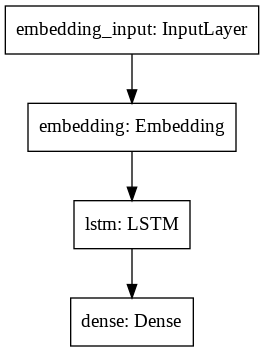

In [ ]:

from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("my_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsmy_model'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['acc'])

In [ ]:
history = model.fit(Input, Output, epochs=20, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/20
379/379 [==============================] - 6s 10ms/step - loss: 7.2177 - acc: 0.0573

Epoch 00001: loss improved from inf to 7.21768, saving model to my_model.h5
Epoch 2/20
379/379 [==============================] - 4s 10ms/step - loss: 6.3438 - acc: 0.0588

Epoch 00002: loss improved from 7.21768 to 6.34381, saving model to my_model.h5
Epoch 3/20
379/379 [==============================] - 4s 10ms/step - loss: 6.2717 - acc: 0.0588

Epoch 00003: loss improved from 6.34381 to 6.27174, saving model to my_model.h5
Epoch 4/20
379/379 [==============================] - 4s 10ms/step - loss: 6.2362 - acc: 0.0588

Epoch 00004: loss improved from 6.27174 to 6.23620, saving model to my_model.h5
Epoch 5/20
379/379 [==============================] - 4s 10ms/step - loss: 6.2110 - acc: 0.0589

Epoch 00005: loss improved from 6.23620 to 6.21095, saving model to my_model.h5
Epoch 6/20
379/379 [==============================] - 4s 10ms/step - loss: 6.1873 - acc: 0.0589

Epoch 00006: loss impr

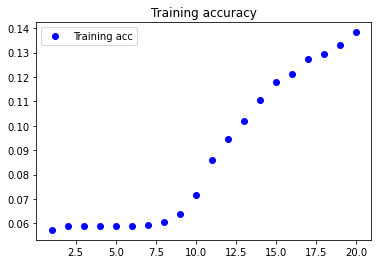

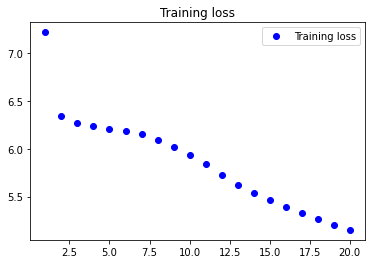

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']

loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.legend()
plt.show()

# Scripts
A small example on how to use the model. 

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('my_model.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = np.array(sequence)
    

    preds = model.predict_classes(sequence,batch_size=3)
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
        if value == preds:
            predicted_word += key
            

    
    return predicted_word




In [ ]:
while(True):

    text = input("Enter your input: ")
    
    if text == "stop":
        print("Bye")
        break
    
    else:
        try:
            print(Predict_Next_Words(model, tokenizer, text))
        except:
            continue


Enter your input: We


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


know
Enter your input: because
of
Enter your input: stop
Bye
